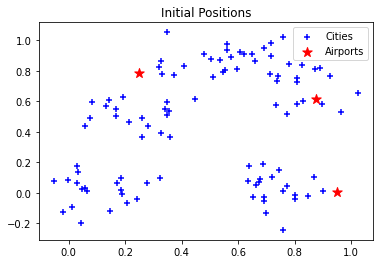

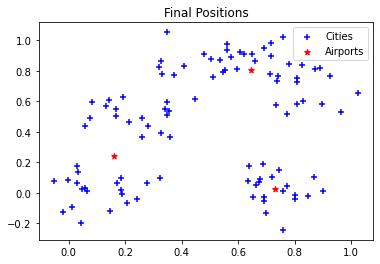

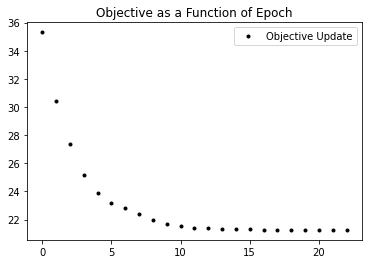

In [3]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt


num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []
total_dist_sum = [] # holds all total distance each run to plot epochs


for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

    
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 
    

# distance formula
def dist_to_ap(ap_cities, airports):
    distance = 0
    for i in range(len(airports)):
        for j in range(len(ap_cities[i])):
            distance += math.sqrt(((airports[i][0]-ap_cities[i][j][0])**2)+((airports[i][1]-ap_cities[i][j][1])**2))
    return distance    
    
    
def assign_closest_ap(city, airports):
    min_dist = 100000
    ca_pair = ()
    for ap in airports:
        dist = math.sqrt(((ap[0]-city[0])**2)+((ap[1]-city[1])**2))
        if dist < min_dist:
            min_dist = dist
            ca_pair = (city, ap)            
    return ca_pair

# returns all cities near their respective closest airport
def assign_cities_to_ap(cities, airports):
    ap_cities = []
    for a in airports:
        cities_near_ap = []
        for c in cities:
            city_to_ap = assign_closest_ap(c, airports)
            if city_to_ap[1] == a:
                cities_near_ap.append(city_to_ap[0])
        ap_cities.append(cities_near_ap)
    return ap_cities
    
def objective_func(airports):
    current_pos = []
    alpha = 0.005
    precision = 0.000001
    
    df = lambda u, v: 2 * (u - v) # gradient descent
    ap_cities = assign_cities_to_ap(cities, airports) 
    total_dist = dist_to_ap(ap_cities, airports) # first total distance of all cities to nearest airports
    total_dist_sum.append(total_dist)
    
    for i in range(len(airports)):
        x = airports[i][0]
        y = airports[i][1]
        for j in range(len(ap_cities[i])):
            x = x - alpha*df(x, ap_cities[i][j][0])
            y = y - alpha*df(y, ap_cities[i][j][1])
        current_pos.append((x,y))
    current_total_dist = dist_to_ap(ap_cities, current_pos)
    if (current_total_dist - total_dist) ** 2 < precision:
        return current_pos
    
    return objective_func(current_pos)


if __name__ == '__main__':       
    #initial
    fig1 = plt.figure(1)
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt.title("Initial Positions")
    plt
    
    #after running gradient
    final_airports = objective_func(airports)

    fig2 = plt.figure(2)
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*final_airports)
    plt.scatter(*zip_airs, marker='*', color='r', label='Airports')
    plt.legend()
    plt.title("Final Positions")
    plt

    #distance updates
    fig3 = plt.figure(3)
    xs = [x for x in range(len(total_dist_sum))]
    plt.plot(xs, total_dist_sum, 'k.', label='Objective Update')
    plt.legend()
    plt.title("Objective as a Function of Epoch")
    plt